# Data Visualization and Feature Analysis Notebook

This notebook will explore the dataset and perform the following tasks:
1. General information about the features
2. Feature analysis (information, visualizations, and correlations)
3. Feature reduction using PCA

---

## 1. General Information About the Features
In this section, we will provide general information about the dataset and its features.


In [1]:
import pandas as pd
import sys
sys.path.append('/Users/Golnaz/Desktop/Golnaz/Carson/')
from src.utils import clean_columns, plot_distribution, plot_category_distribution, plot_category_distribution_separately


dataset_path = '/Users/Golnaz/Desktop/Golnaz/Carson/datasets/Labelled_data_v4.xlsx' #TODO:clean this up

# Load dataset
df = pd.read_excel(dataset_path)

# Display general information
df_info = df.info()
df_describe = df.describe()
df_head = df.head()
df_columns = df.columns

df_info, df_describe, df_head
for i in df_columns:
    print(i)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11547 entries, 0 to 11546
Columns: 127 entries, OBJECTID to Stream_Length
dtypes: float64(91), int64(36)
memory usage: 11.2 MB
OBJECTID
Order_
Magnitude
WSNO
Edge_Flow
CAatINLET
CAatOUTLET
WatercourseRank
Shape_Length
Buffer
StreamID
CHM_MIN
CHM_MAX
CHM_MEAN
CHM_STD
CHM_MEDIAN
CHM_RANGE
CHM_PCT90
DTW_MIN
DTW_MAX
DTW_RANGE
DTW_MEAN
DTW_STD
DTW_MEDIAN
DTW_PCT90
DEM_MIN
DEM_MAX
DEM_RANGE
DEM_MEAN
DEM_STD
DEM_MEDIAN
DEM_PCT90
TRI_MIN
TRI_MAX
TRI_RANGE
TRI_MEAN
TRI_STD
TRI_MEDIAN
TRI_PCT90
TPI_MIN
TPI_MAX
TPI_RANGE
TPI_MEAN
TPI_STD
TPI_MEDIAN
TPI_PCT90
CNVRGI_MIN
CNVRGI_MAX
CNVRGI_RANGE
CNVRGI_MEAN
CNVRGI_STD
CNVRGI_MEDIAN
CNVRGI_PCT90
Z_Mean
Min_Slope
Max_Slope
Avg_Slope
Start_X
Start_Y
End_X
End_Y
Straight_L
Sinuosity
Z_Min
Z_Max
Drop_
Start_X_GCS
End_X_GCS
Start_Y_GCS
End_Y_GCS
ExcessMoist_MIN
ExcessMoist_MAX
ExcessMoist_RANGE
ExcessMoist_MEAN
ExcessMoist_STD
ExcessMoist_MEDIAN
ExcessMoist_PCT90
VegComp_MIN
VegComp_MAX
VegComp_RANGE
VegCo

## 2. Feature Analysis (Information, Visualizations, and Correlations)
In this section, we will perform the following tasks:
- View information about a selected feature
- Plot the distribution of the feature
- View histograms of the feature based on `WatercourseRank`
- Calculate correlations of the feature with `WatercourseRank`
- Visualize scatter plots of the feature vs `WatercourseRank`
- Show the correlation of the feature with other features and list the top 10 correlations


In [2]:
df = df.dropna()
df.drop(columns=["OBJECTID", "Buffer", "StreamID"], inplace=True)
labels = df['WatercourseRank']

#readd watercourse feature to the dataset
df['WatercourseRank'] = labels

print(df.columns.shape)




(124,)


Number of samples after eliminating class 0: 11540
Number of features: 124


<Figure size 640x480 with 0 Axes>

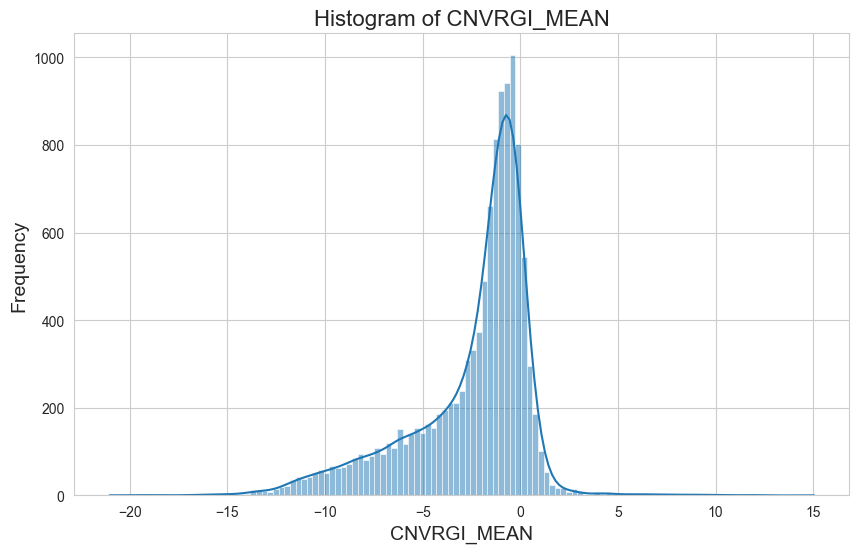

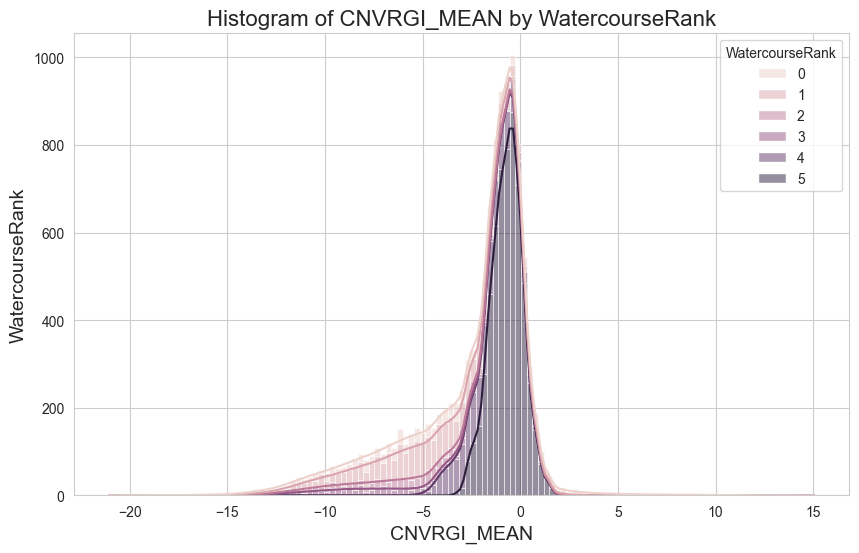

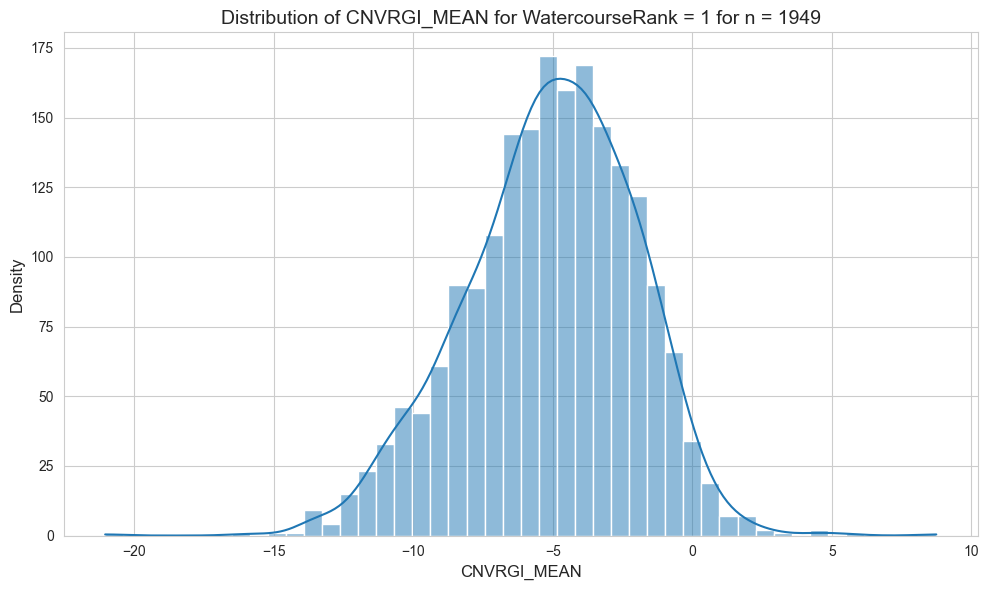

Plot saved to plots/group_individual_plot/CNVRGI_MEAN_by_WatercourseRank_1.png


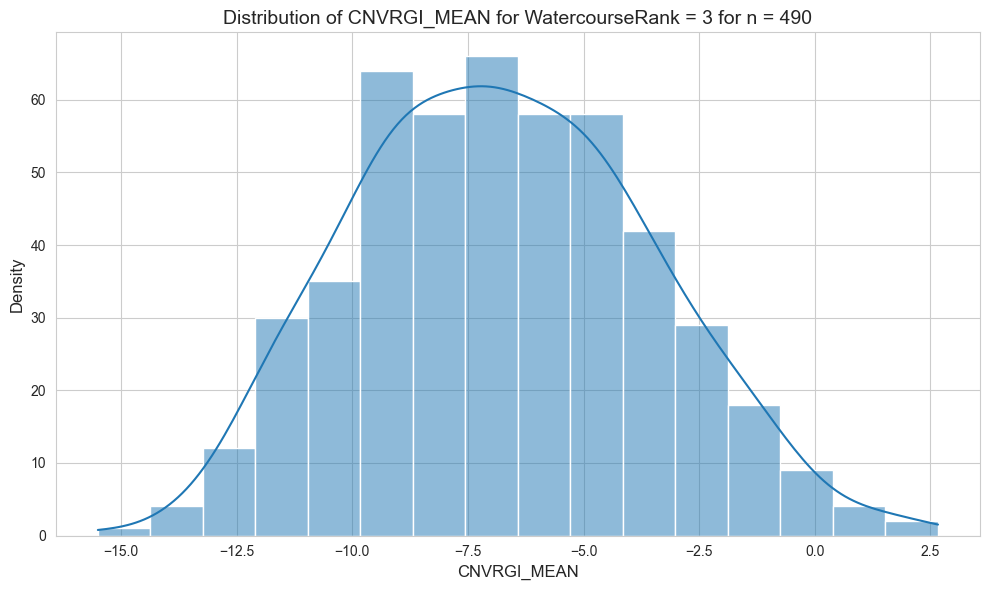

Plot saved to plots/group_individual_plot/CNVRGI_MEAN_by_WatercourseRank_3.png


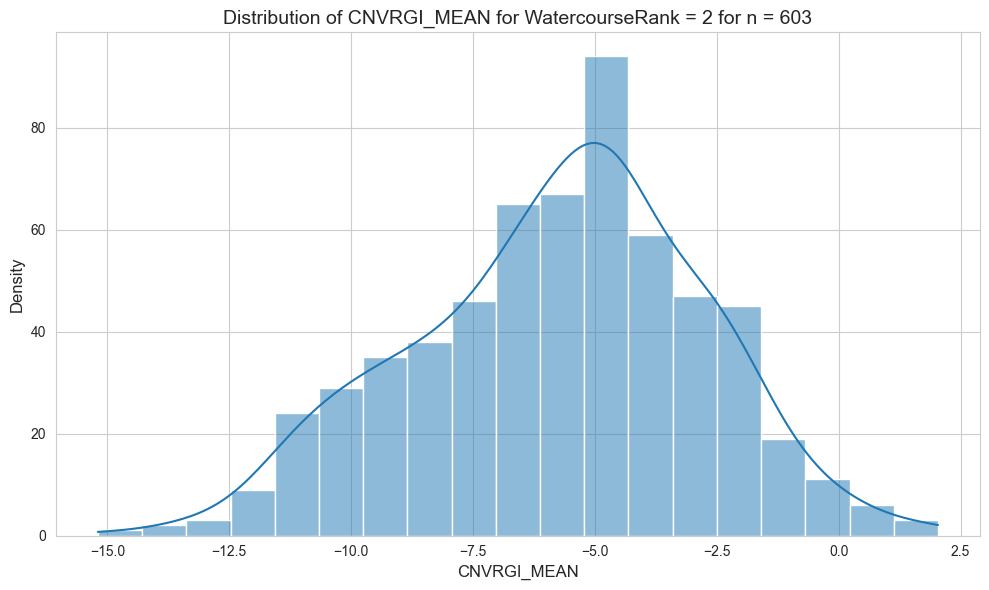

Plot saved to plots/group_individual_plot/CNVRGI_MEAN_by_WatercourseRank_2.png


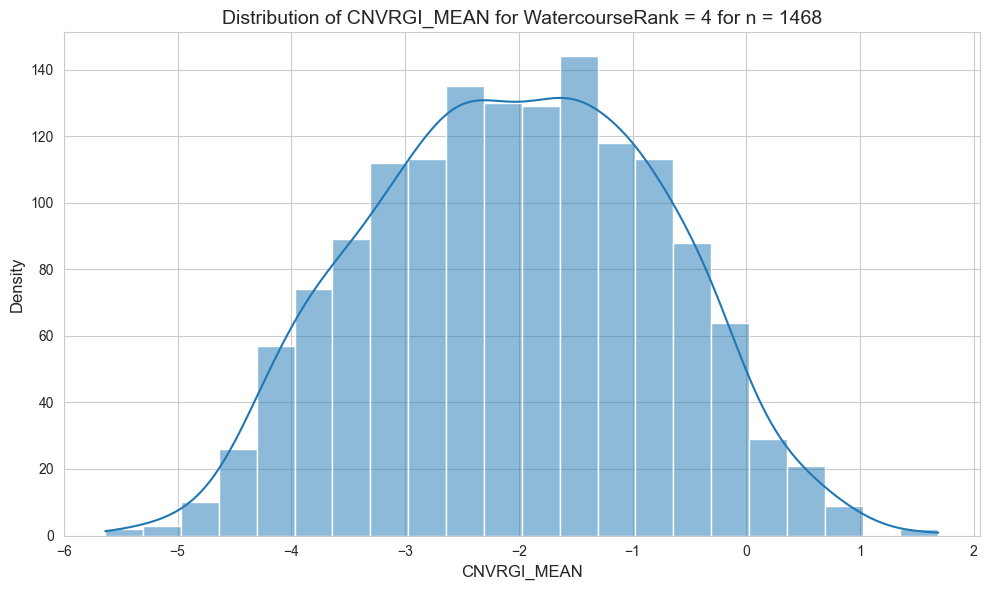

Plot saved to plots/group_individual_plot/CNVRGI_MEAN_by_WatercourseRank_4.png


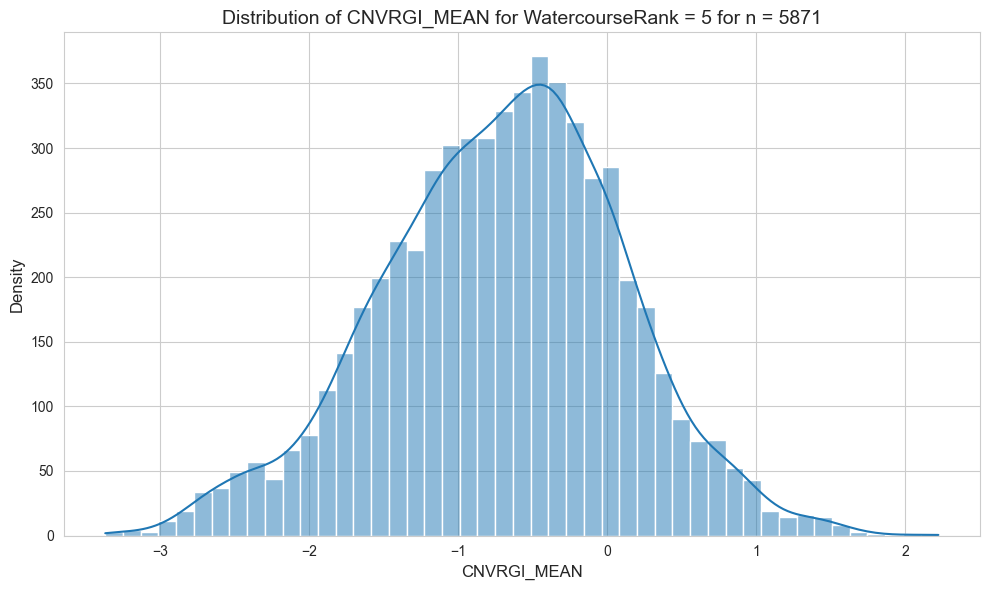

Plot saved to plots/group_individual_plot/CNVRGI_MEAN_by_WatercourseRank_5.png


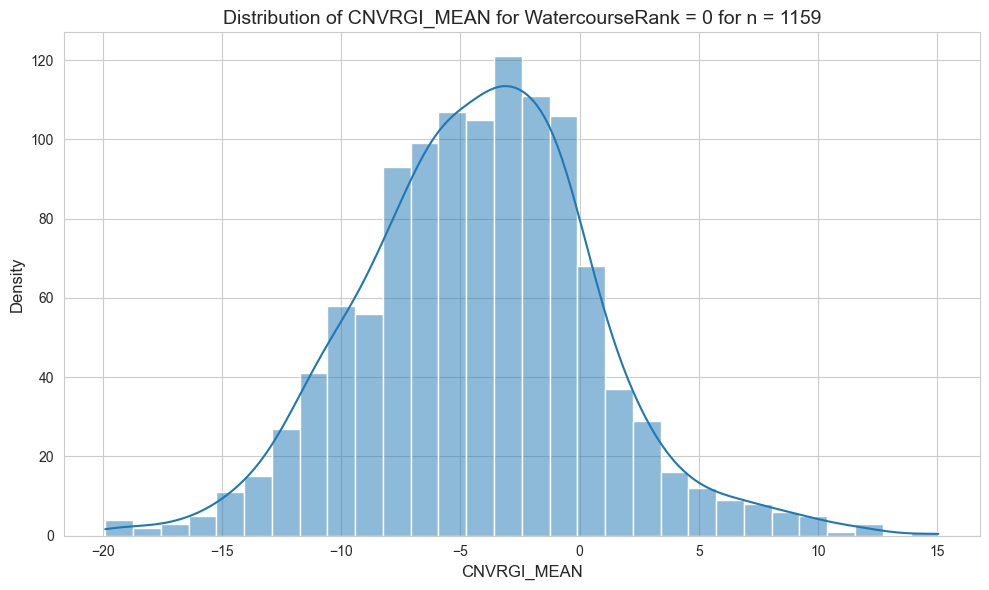

Plot saved to plots/group_individual_plot/CNVRGI_MEAN_by_WatercourseRank_0.png


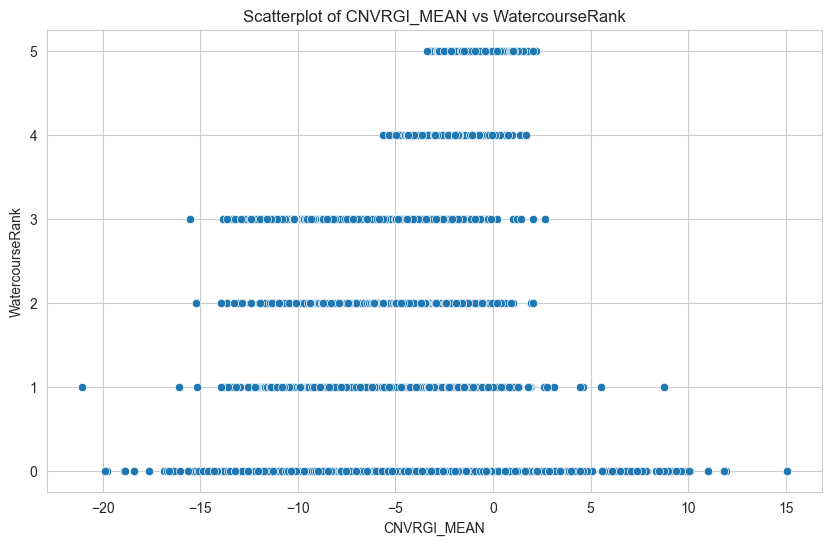

Correlation between CNVRGI_MEAN and WatercourseRank: 0.5817517706450765
Top 10 features with highest correlation with CNVRGI_MEAN:


CNVRGI_MEDIAN        0.79
WatercourseRank      0.58
CNVRGI_MAX           0.57
CNVRGI_PCT90         0.56
Order_               0.55
                     ... 
CHM_MEAN            -0.38
Compaction_MEDIAN   -0.40
TRI_MIN             -0.40
Compaction_MEAN     -0.42
DTW_MIN               NaN
Name: CNVRGI_MEAN, Length: 123, dtype: float64

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Let's choose a feature (replace 'FeatureName' with the desired column name)
feature = 'CNVRGI_MEAN'  # Change this to the actual feature name

# Eliminate class 0
#df = df[df['WatercourseRank'] != 0]
print(f"Number of samples after eliminating class 0: {len(df)}")
print(f"Number of features: {len(df.columns)}")

# Display feature info
feature_info = df[feature].describe()

# Plot distribution of the selected feature
plot_distribution(df, feature)

# Plot category distribution for the feature based on 'WatercourseRank'
plot_category_distribution(df, feature, 'WatercourseRank')
plot_category_distribution_separately(df, feature, 'WatercourseRank')

# Scatter plot of the feature vs WatercourseRank
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature, y="WatercourseRank")
plt.title(f"Scatterplot of {feature} vs WatercourseRank")
plt.xlabel(feature)
plt.ylabel("WatercourseRank")
plt.show()

# Calculate and display the correlation with 'WatercourseRank'
correlation_with_watercourse = df[feature].corr(df['WatercourseRank'])
print(f"Correlation between {feature} and WatercourseRank: {correlation_with_watercourse}")

# Calculate and display the correlation with other features
print(f"Top 10 features with highest correlation with {feature}:")
correlation_matrix = df.corr()
top_10_features = correlation_matrix[feature].sort_values(ascending=False).iloc[1:].round(2)
top_10_features

# Plot the Correlation Heatmap for just the top 10 features
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix.loc[top_10_features.index.union([feature]), top_10_features.index.union([feature])], annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.savefig(f'plots/correlation_heatmap_{feature}.png')



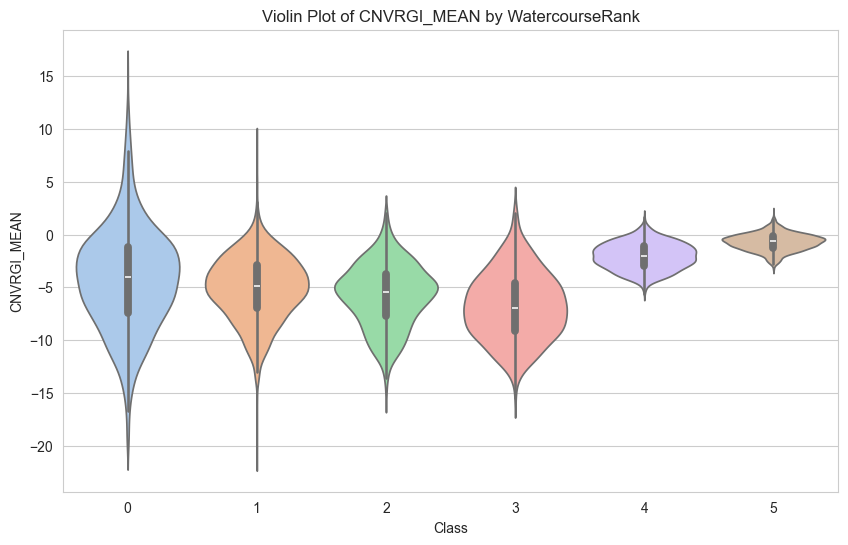

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin(df, feature, target):
    """
    Plots a violin plot for the given feature, grouped by the target variable.
    
    Parameters:
    df (pd.DataFrame): The dataset containing the features and target.
    feature (str): The feature column to visualize.
    target (str): The target column with class labels.
    """
    plt.figure(figsize=(10, 6))
    #sns.violinplot(x=target, y=feature, data=df, inner='box', palette='pastel')
    sns.violinplot(x=target, y=feature, data=df, inner='box', palette='pastel', hue=target, legend=False)

    plt.xlabel("Class")
    plt.ylabel(feature)
    plt.title(f"Violin Plot of {feature} by {target}")
    plt.show()

# Example usage:
plot_violin(df, feature, "WatercourseRank")

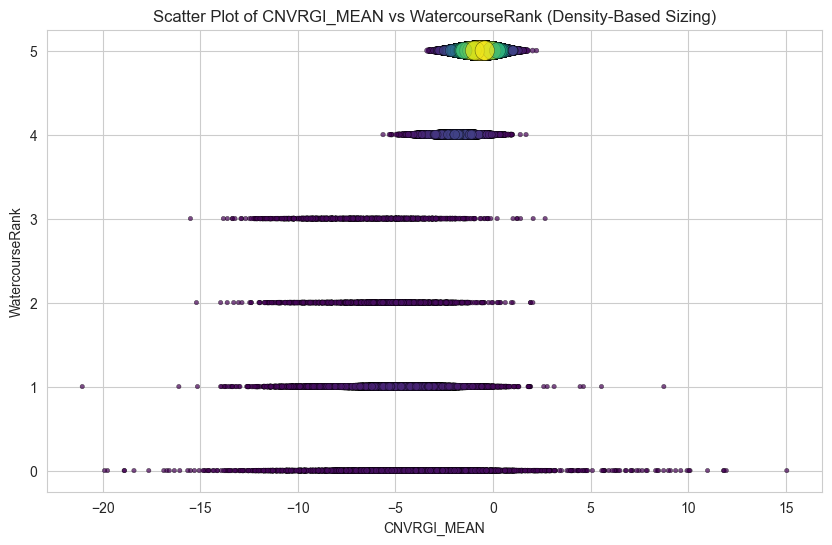

In [5]:
import numpy as np
from scipy.stats import gaussian_kde
def plot_scatter_density(df, feature, target):
    """
    Plots a scatter plot of feature vs target where point size represents density.
    
    Parameters:
    df (pd.DataFrame): The dataset containing the features and target.
    feature (str): The feature column.
    target (str): The target column.
    """
    plt.figure(figsize=(10, 6))
    
    # Compute density
    xy = np.vstack([df[feature], df[target]])
    density = gaussian_kde(xy)(xy)
    
    # Normalize size
    sizes = 100 * (density - density.min()) / (density.max() - density.min()) + 10
    
    sns.scatterplot(x=df[feature], y=df[target], size=sizes, sizes=(10, 200), hue=density, palette='viridis', edgecolor='k', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"Scatter Plot of {feature} vs {target} (Density-Based Sizing)")
    plt.legend([],[], frameon=False)  # Hide redundant legend
    plt.show()

# Example usage:
# df = pd.read_csv("your_dataset.csv")
# plot_violin(df, "your_feature", "your_target")
plot_scatter_density(df, feature, "WatercourseRank")

0.9999701818332669 -88962.78435661155


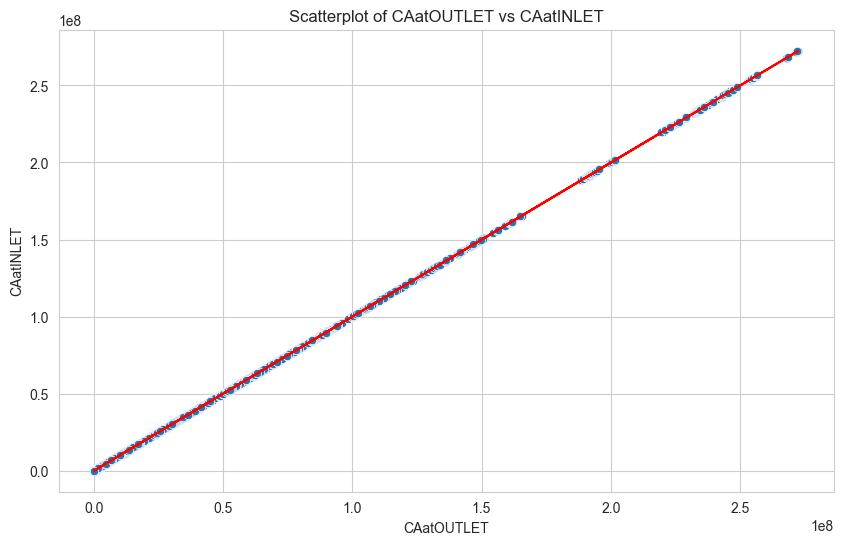

In [6]:
# print the first ten rows of CatOUTLET and CAatINLET
# print(df[['CAatOUTLET', 'CAatINLET']].head(10))
# #print the difference between CAatOUTLET and CAatINLET for the first 10 rows
# what is the relationship between CAatOUTLET and CAatINLET?
x = df['CAatOUTLET']
y = df['CAatINLET']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.xlabel("CAatOUTLET")
plt.ylabel("CAatINLET")
plt.title("Scatterplot of CAatOUTLET vs CAatINLET")
slope, intercept = np.polyfit(x, y, 1)
print(slope, intercept)
plt.plot(x, slope*x + intercept, color='red')
plt.show()


In [7]:
# All zero features
zero_columns = df.columns[(df == 0).all()]
print("Columns with all zeros:")
print(zero_columns)

# Zero variance features
zero_variance_columns = df.columns[df.nunique() <= 1]
print("Columns with zero variance:")
print(zero_variance_columns)

# Small Variance features
small_variance_columns = df.columns[df.var() < 0.01]
print("Columns with very small variance:")
print(small_variance_columns)
print(df[small_variance_columns].describe())

# delete features with zero variance
df = df.drop(zero_variance_columns, axis=1)


# delete label column
df = df.drop(['WatercourseRank'], axis=1)

correlations = df.corr()
# Ensure all 123 features are included in the correlation matrix
if correlations.shape[0] != 122 or correlations.shape[1] != 122:
    print(f"Warning: Correlation matrix dimensions are {correlations.shape}, expected (122, 122).")



Columns with all zeros:
Index(['DTW_MIN'], dtype='object')
Columns with zero variance:
Index(['DTW_MIN'], dtype='object')
Columns with very small variance:
Index(['DTW_MIN', 'TRI_MIN'], dtype='object')
       DTW_MIN       TRI_MIN
count  11540.0  11540.000000
mean       0.0      0.030778
std        0.0      0.031585
min        0.0      0.000000
25%        0.0      0.013411
50%        0.0      0.021469
75%        0.0      0.036330
max        0.0      0.528166


In [8]:
# print the first 10 feature pairs that have the highest correlation, except for the diagonal
print("Top 10 feature pairs with highest correlation:")
correlation_pairs = correlations.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Exclude self-correlations
top_10_pairs = correlation_pairs.head(40)
print(top_10_pairs)


Top 10 feature pairs with highest correlation:
CAatINLET    CAatOUTLET     0.999999
CAatOUTLET   CAatINLET      0.999999
Start_X      End_X          0.999997
End_X        Start_X        0.999997
End_X_GCS    Start_X_GCS    0.999997
Start_X_GCS  End_X_GCS      0.999997
End_Y        Start_Y        0.999996
Start_Y      End_Y          0.999996
End_Y_GCS    Start_Y_GCS    0.999996
Start_Y_GCS  End_Y_GCS      0.999996
DEM_MIN      Z_Min          0.999988
Z_Min        DEM_MIN        0.999988
DEM_MEDIAN   DEM_MEAN       0.999965
DEM_MEAN     DEM_MEDIAN     0.999965
DEM_MEDIAN   Z_Mean         0.999901
Z_Mean       DEM_MEDIAN     0.999901
DEM_MEAN     Z_Mean         0.999869
Z_Mean       DEM_MEAN       0.999869
End_X        End_X_GCS      0.999649
End_X_GCS    End_X          0.999649
Start_X      Start_X_GCS    0.999649
Start_X_GCS  Start_X        0.999649
End_X_GCS    Start_X        0.999646
Start_X      End_X_GCS      0.999646
Start_X_GCS  End_X          0.999645
End_X        Start_X_GCS    

The two correlation matrices are the same.


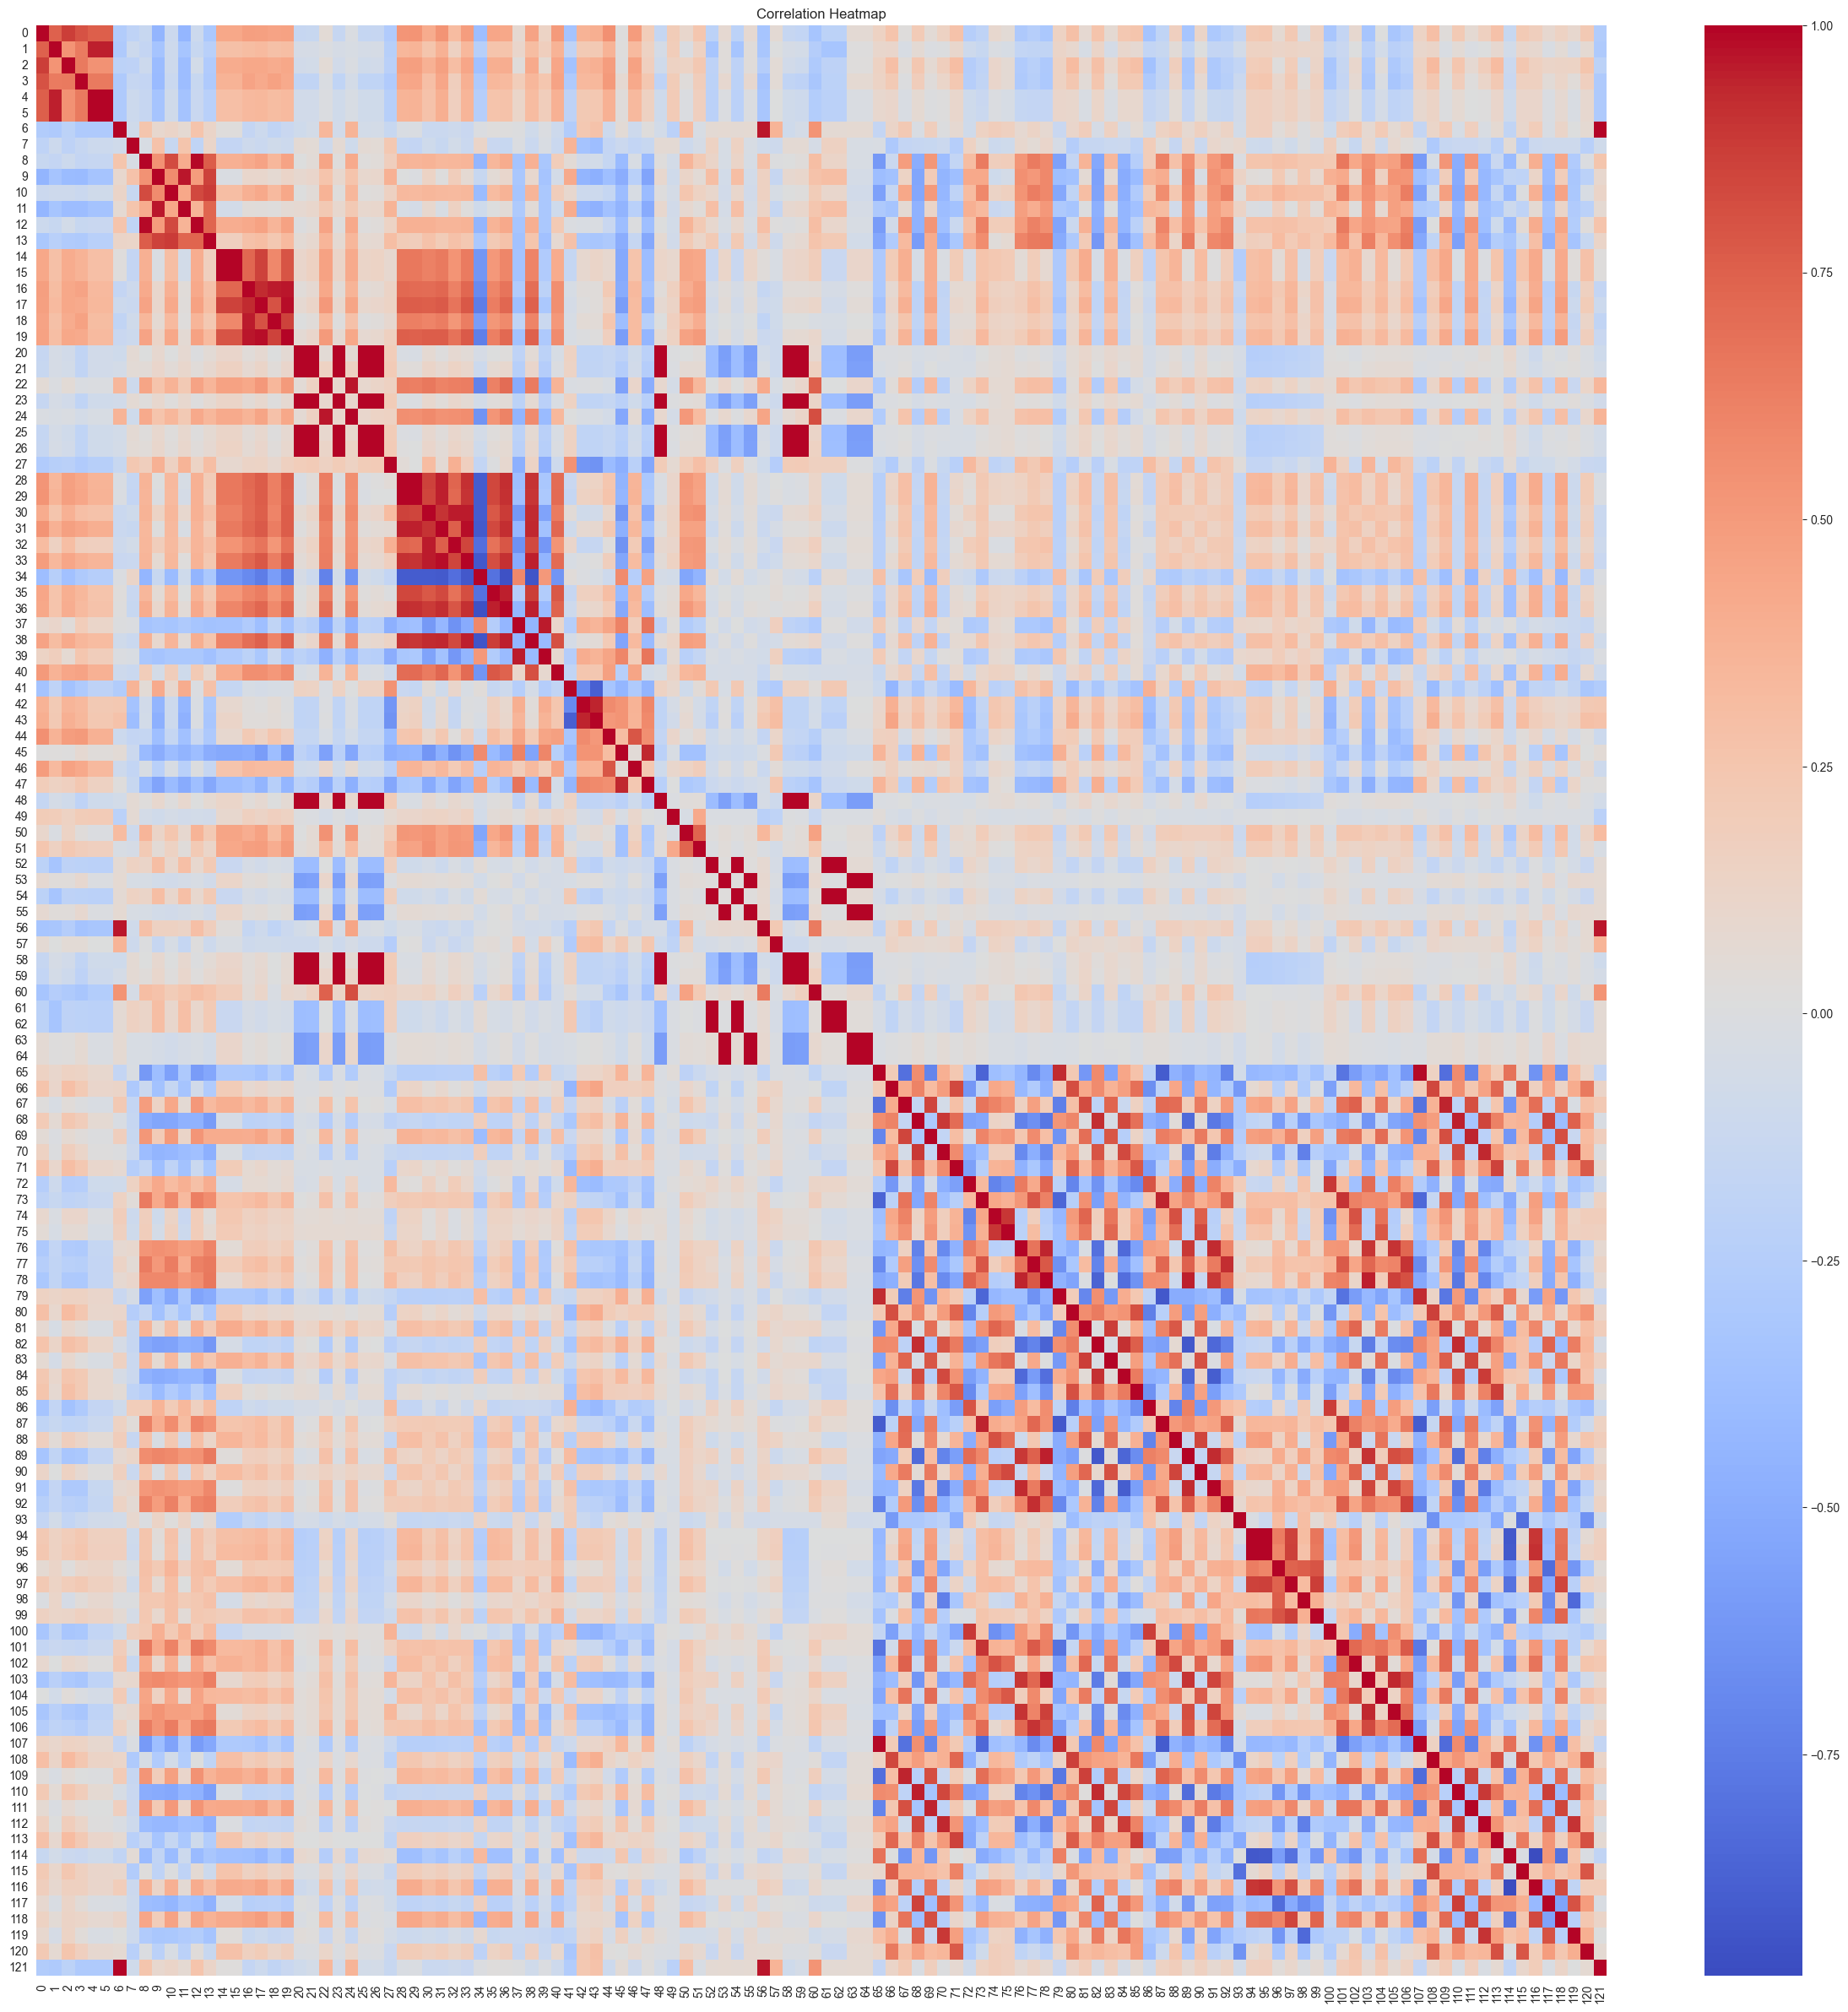

In [9]:
# find elements in the correlation matrix with nan value
#save the correlation matrix to a csv file  
correlations.to_csv('correlation_matrix.csv')
# Display the correlation matrix
correla = correlations.fillna(0)
correla.to_csv('correlation_matrix_nan.csv')
corr1 = pd.read_csv('correlation_matrix_nan.csv')
corr2 = pd.read_csv('correlation_matrix.csv')
# check if the two correlation matrices are the same
if corr1.equals(corr2):
    print("The two correlation matrices are the same.")
else:
    print("The two correlation matrices are different.")
# correlations.columns = df.columns
# correlations.index = df.columns
# correlations = correlations.iloc[:20, :20]

plt.figure(figsize=(30, 30))
# add the feature names to the correlation matrix
correlations.index = range(correlations.shape[0])
correlations.columns = range(correlations.shape[1])
plt.xticks(ticks=range(0, correlations.shape[1], 2), labels=range(0, correlations.shape[1], 2), rotation=90)
plt.yticks(ticks=range(0, correlations.shape[1], 2), labels=range(0, correlations.shape[1], 2), rotation=0)
sns.heatmap(correlations, annot=False, cmap='coolwarm', cbar=True)
# write the labels bigger
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlabel("Features", fontsize=20)
# plt.ylabel("Features", fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()  




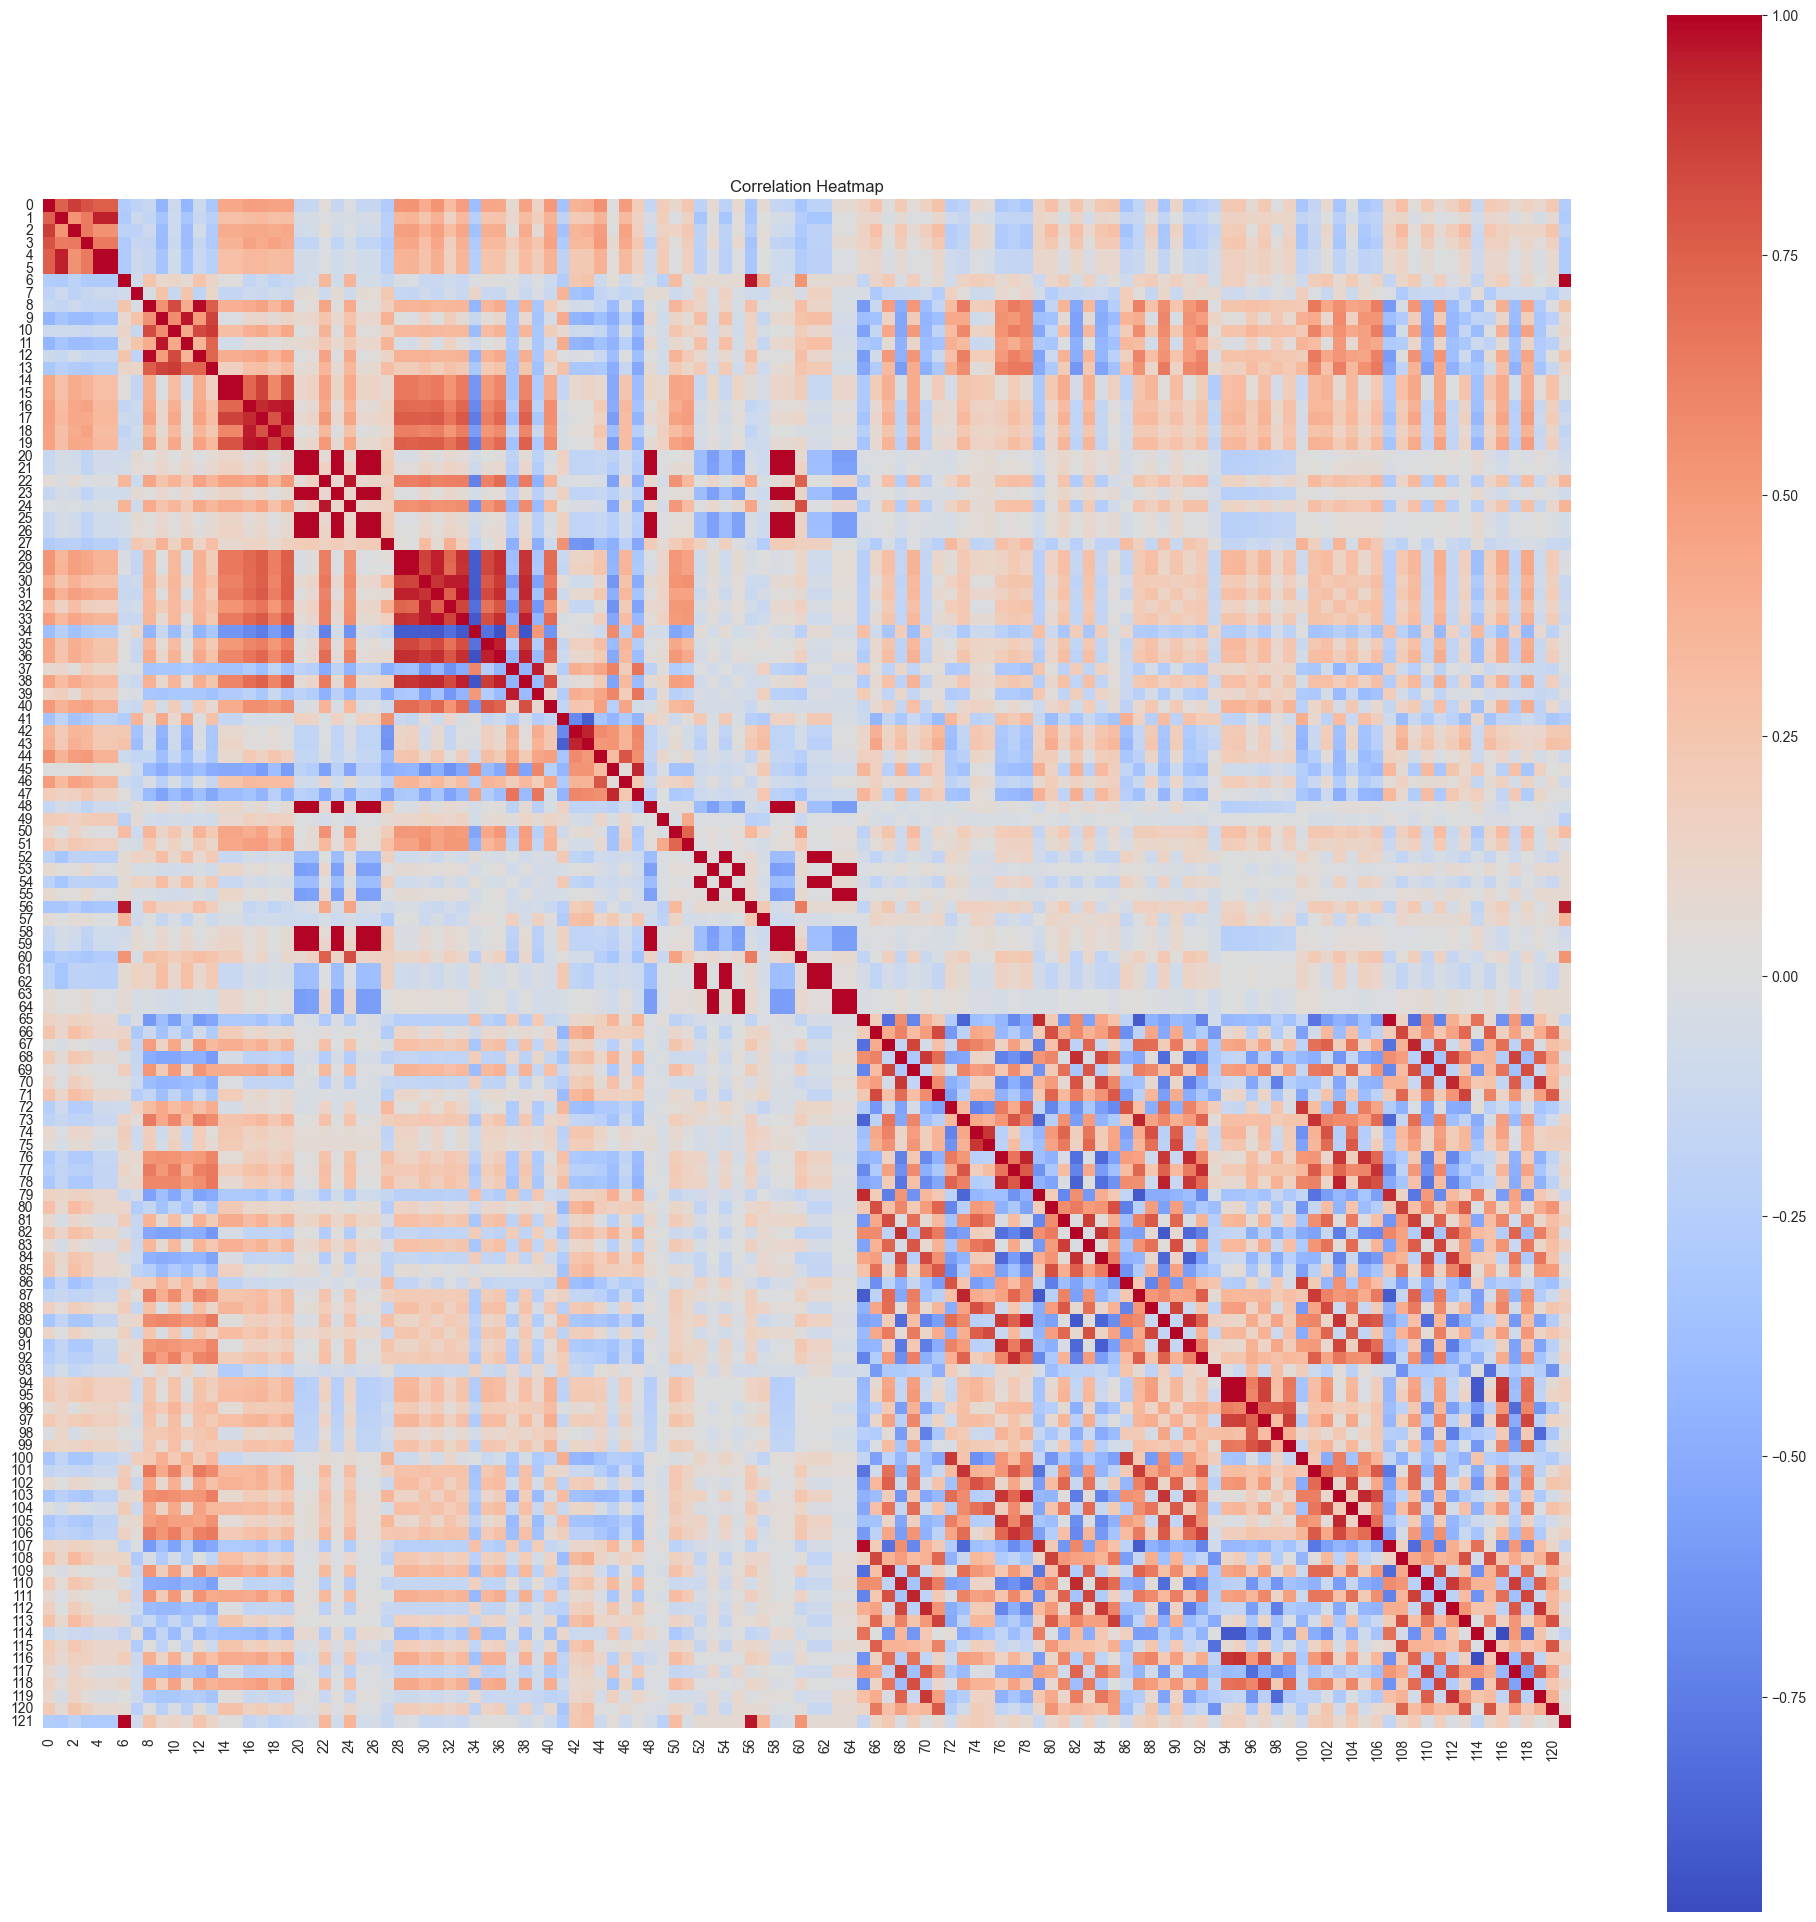

In [10]:
# this correlation matrix has a lot of rows and columns, make sure to visualize all of them
# keep the first 20 rows and columns
# correlations = correlations.iloc[:20, :20]
# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
# instead of the name of the columns, use the index of the columns
correlations.index = range(correlations.shape[0])
correlations.columns = range(correlations.shape[1])
plt.xticks(ticks=range(0, correlations.shape[1], 2), labels=range(0, correlations.shape[1], 2), rotation=90)
plt.yticks(ticks=range(0, correlations.shape[1], 2), labels=range(0, correlations.shape[1], 2), rotation=0)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap")
plt.tight_layout()
# Plot the heatmap
sns.heatmap(correlations, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()